# Загрузка библиотек

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Загрузка данных

In [379]:
df = pd.read_csv('police shootings.csv')
df.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,longitude,latitude,is_geocoding_exact
0,1,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,-123.122,47.247,True
1,2,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,-122.892,45.487,True
2,3,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,-97.281,37.695,True
3,4,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,-122.422,37.763,True
4,5,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,-104.692,40.384,True


# Описание значений!

id                      - индеск

name                    - имя

date                    - дата 

manner of death         - способ смерти

armed                   -  вооружение

age                     - возрост

gender                  - пол

race                    - раса

city                    - город

state                   - штат

signs of mental illness - признаки психологического заболивания

threat level            - уровень угрозы

flee                    - скрыться

body camera             - камера

longitude               - наблюдения долгота

latitude                - широта

is geocoding exact      - точные геокодирование

# Проверка пустых значений!

In [415]:
print(len(df))
df.isnull().sum() #проверка пустых значений в данных

7709


armed                         0
age                           0
race                       1442
city                          0
state                         0
signs_of_mental_illness       0
threat_level                  0
flee                          0
body_camera                   0
longitude                   833
latitude                    833
is_geocoding_exact            0
week                          0
year                          0
month                         0
dtype: int64

# Количество уникальнх значений в столбцах!

In [381]:
columns_list = ['id','name','date','manner_of_death','armed','age','gender','race','city','state',
                'signs_of_mental_illness','threat_level','flee','body_camera','longitude','latitude',
                'is_geocoding_exact']
for i in columns_list:
    print(i, len(df[i].value_counts()))

id 7729
name 7280
date 2620
manner_of_death 2
armed 104
age 81
gender 2
race 6
city 3148
state 51
signs_of_mental_illness 2
threat_level 3
flee 4
body_camera 2
longitude 6031
latitude 5330
is_geocoding_exact 2


# Проверяем гендор

In [382]:
# [['name','age','gender','race']]
df[df['gender'].isnull()][['name','age','gender','race','manner_of_death','armed','threat_level','flee']]

,name,age,gender,race,manner_of_death,armed,threat_level,flee
2652,Scout Schultz,21.0,NaN,W,shot,knife,other,Not fleeing
6504,NaN,NaN,NaN,NaN,shot,undetermined,undetermined,NaN
6882,NaN,NaN,NaN,NaN,shot,gun and vehicle,attack,NaN
6907,NaN,NaN,NaN,NaN,shot,gun,attack,Not fleeing
7039,NaN,NaN,NaN,NaN,shot,gun,undetermined,Foot
7181,NaN,NaN,NaN,NaN,shot,gun,attack,Car
7281,NaN,NaN,NaN,NaN,shot,gun,attack,Foot
7286,NaN,NaN,NaN,NaN,shot,gun,attack,Foot
7313,Aerie Sadler,25.0,NaN,NaN,shot,undetermined,undetermined,NaN
7321,Larry Marquail Mixon,19.0,NaN,NaN,shot,gun,attack,NaN


In [383]:
df['manner_of_death'].value_counts()

shot                7390
shot and Tasered     339
Name: manner_of_death, dtype: int64

In [384]:
#df.drop(index=[df[df['gender'].isnull()].index])
g_list = list(df[df['gender'].isnull()].index)
df = df.drop(index=g_list)
df[df['gender'].isnull()]

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,longitude,latitude,is_geocoding_exact


<AxesSubplot:>

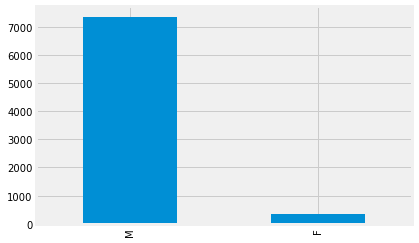

In [385]:
df['gender'].value_counts().plot.bar()

In [386]:
'%.2f'%(df['gender'].value_counts().max()/len(df))

'0.95'

Как понимаю у большинство убитых людей у которых не было возможно определить полони их останки были следовательно в виде костей или(и) мяса. В случи когда были известно имя и возраст была совершена ошибка. Так же мне кажется, что они найдены через год и более тогда тело уже разложится и определить пол будет не возможно, очень сложно. Так же замечу что орудие убийства не известно. Но всегда известно что был выстрел. По этому столбец 'manner_of_death' удаляем так как он не несет в себе полезной информации. Также столбец gender нельзя оперировать, так как в 95% случаев это мужчины.

In [387]:
df = df.drop(columns=['gender', 'manner_of_death'])

# Проверка можно ли както систематизировать имена.

In [388]:
df['name'].str.split(' ',expand=True).head()

,0,1,2,3,4
0,Tim,Elliot,None,None,None
1,Lewis,Lee,Lembke,None,None
2,John,Paul,Quintero,None,None
3,Matthew,Hoffman,None,None,None
4,Michael,Rodriguez,None,None,None


In [389]:
# Количество уникальных значений в 0 столбце 
len(df['name'].str.split(' ',expand=True)[[0]].value_counts())

1945

In [390]:
# Количество уникальных значений в 1 столбце
len(df['name'].str.split(' ',expand=True)[[1]].value_counts())

3505

По количеству уникальных значений столбец name систематизации не поддается. Следовательно удаляется за ненадобности.
Столбец id удаляется так как показывает порядковый номер.

In [391]:
df = df.drop(columns=['id','name'])
df.head()

,date,armed,age,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,longitude,latitude,is_geocoding_exact
0,2015-01-02,gun,53.0,A,Shelton,WA,True,attack,Not fleeing,False,-123.122,47.247,True
1,2015-01-02,gun,47.0,W,Aloha,OR,False,attack,Not fleeing,False,-122.892,45.487,True
2,2015-01-03,unarmed,23.0,H,Wichita,KS,False,other,Not fleeing,False,-97.281,37.695,True
3,2015-01-04,toy weapon,32.0,W,San Francisco,CA,True,attack,Not fleeing,False,-122.422,37.763,True
4,2015-01-04,nail gun,39.0,H,Evans,CO,False,attack,Not fleeing,False,-104.692,40.384,True


# Определяем возрост

In [392]:
# Определяем mean по (городам) где количество убийств с известым возрастом больше,
# количества убийств с неитзвестным возростом в 4-ре раза и присваеваем его пустым значениям.
for i in df[df['age'].isnull()]['city']:
    df_ = df[df['city']== i]['age']
    if (len(df_) > 10)&\
       (len(df_[df_.isnull()])*4 < len(df_)):
        for u in df_[df_.isnull()].index:
            df['age'][u] = df_.mean()

# Определяем mean по (штатам) и присваеваем его пустым значениям
for i in df[df['age'].isnull()]['state']:
    df_ = df[df['state']== i]['age']
    for u in df_[df_.isnull()].index:
        df['age'][u] = df_.mean()

<AxesSubplot:ylabel='Frequency'>

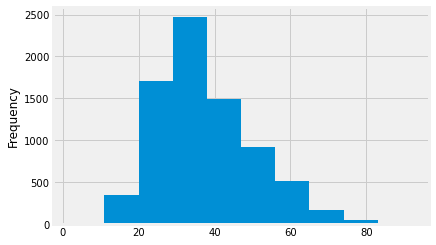

In [393]:
df['age'].plot.hist()

In [394]:
df['age'].agg([max,min])

max    92.0
min     2.0
Name: age, dtype: float64

Средний возраст убитых людей. От 20 до 50 лет. Самому старому убитому человеку было 92 года, а самому юному 2 года. 

# Работа с датой

In [395]:
df['date'] = pd.to_datetime(df['date'])
df['week'] = df.date.dt.dayofweek
df['year'] = df.date.dt.year
df['month'] = df['date'].dt.month
df = df.drop(columns=['date'])

In [396]:
pd.crosstab(df['year'],df['month']).style.background_gradient(cmap='summer_r')

month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
2015,76,77,92,84,71,65,104,94,82,84,77,88
2016,81,86,92,73,74,91,72,82,77,78,77,75
2017,91,100,76,67,73,84,94,82,69,84,83,77
2018,98,79,108,97,83,81,88,75,59,78,76,71
2019,93,72,88,71,74,86,80,86,78,89,76,106
2020,88,78,93,79,111,77,68,87,59,100,91,89
2021,80,96,88,88,84,109,72,97,82,94,72,89
2022,72,90,98,84,91,89,95,72,23,0,0,0


In [397]:
pd.crosstab(df['month'],df['year']).style.background_gradient(cmap='summer_r')

year,2015,2016,2017,2018,2019,2020,2021,2022
month,,,,,,,,
1,76,81,91,98,93,88,80,72
2,77,86,100,79,72,78,96,90
3,92,92,76,108,88,93,88,98
4,84,73,67,97,71,79,88,84
5,71,74,73,83,74,111,84,91
6,65,91,84,81,86,77,109,89
7,104,72,94,88,80,68,72,95
8,94,82,82,75,86,87,97,72
9,82,77,69,59,78,59,82,23


<AxesSubplot:>

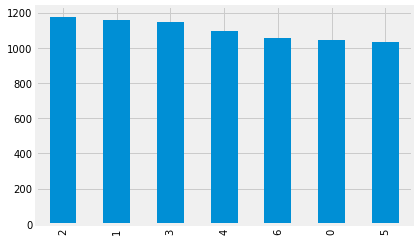

In [398]:
df['week'].value_counts().plot.bar()

<AxesSubplot:>

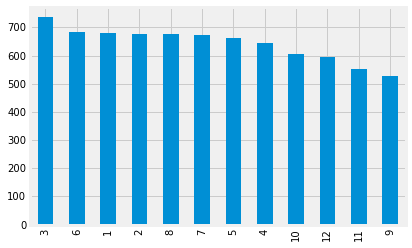

In [399]:
df['month'].value_counts().plot.bar()

<AxesSubplot:>

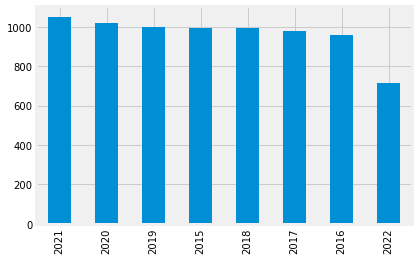

In [400]:
df['year'].value_counts().plot.bar()

По графикам видно что количество зарегистрированных преступлений, растет. 2022 год не заполнен до конца и счет идет до конца  08.2022 начала 09.2022. Чаще всего преступления возникают со Вт по Пт. В выходные и Пн количество преступлений снижается. Самый опасный месяц является Март, самым безопасный еще не известен, так как 2022 год еще не прошел.

# Скрыля или нет

In [401]:
df['flee'].value_counts()

Not fleeing    4333
Car            1247
Foot            979
Other           287
Name: flee, dtype: int64

In [402]:
df['flee'][df['flee'].isnull()] = 'Other'

<AxesSubplot:>

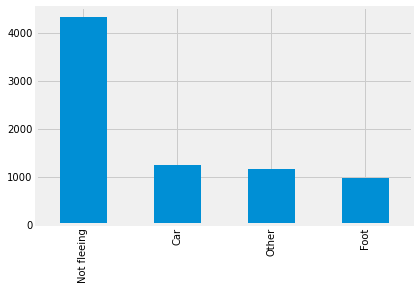

In [403]:
df['flee'].value_counts().plot.bar()

In [404]:
'%.2f'%((len(df[df['flee'] == "Not fleeing"]))/len(df))

'0.56'

По результатом видно что только в 56% случаев преступникам не удавалась скрыться. Что является очень большим количеством скрывшихся. Единственный способ это объяснить считать, что трупы находили через несколько дней после преступления.

# Оружие

In [405]:
print('Количество пустых значений: ',len(df['armed'][df['armed'].isnull()]))

Количество пустых значений:  209


In [406]:
print(df['armed'].value_counts().head(10))

gun               4397
knife             1106
unarmed            456
undetermined       309
vehicle            275
toy weapon         245
unknown weapon     117
machete             61
Taser               38
ax                  27
Name: armed, dtype: int64


In [407]:
df['armed'][df['armed'].isnull()] = 'undetermined'

Head
gun               4397
knife             1106
undetermined       518
unarmed            456
vehicle            275
toy weapon         245
unknown weapon     117
machete             61
Taser               38
ax                  27
Name: armed, dtype: int64

Down
flagpole                          1
oar                               1
machete and gun                   1
baseball bat and bottle           1
fireworks                         1
pen                               1
chainsaw                          1
gun and sword                     1
claimed to be armed               1
knife, hammer and gasoline can    1
Name: armed, dtype: int64


<AxesSubplot:>

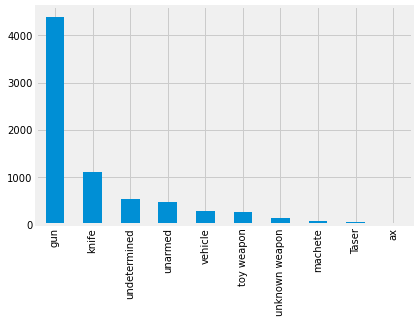

In [408]:
print('Head')
print(df['armed'].value_counts().head(10))
print('\n'+'Down')
print(df['armed'].value_counts()[-10:])
df['armed'].value_counts().head(10).plot.bar()

In [409]:
'%.2f'%(df['armed'].value_counts().max()/len(df))

'0.57'

Видно что самым частым оружием используется пистолет, в 57% случаев. Так же видно что в таблице используются перечисление орудий убийства. Так можно понять что unknown weapon, undetermined показывает что оружие не было понятно, но точно использовалось. По этому nan были заполнены такими же значениями. Можно сделать ввод что наиболее частое орудие убийства это пистолет и нож и убийство голыми руками.

# Камеры

In [410]:
pd.crosstab(df['year'],df['body_camera']).style.background_gradient(cmap='summer_r')

body_camera,False,True
year,,
2015,919,75
2016,813,145
2017,871,109
2018,871,122
2019,863,136
2020,845,175
2021,835,216
2022,587,127


In [411]:
pd.crosstab(df['year'],df['flee']).style.background_gradient(cmap='summer_r')

flee,Car,Foot,Not fleeing,Other
year,,,,
2015,143,108,717,26
2016,144,121,626,67
2017,179,122,597,82
2018,160,136,615,82
2019,173,138,593,95
2020,177,142,533,168
2021,167,126,442,316
2022,104,86,210,314


In [412]:
pd.crosstab(df['body_camera'],df['threat_level']).style.background_gradient(cmap='summer_r')

threat_level,attack,other,undetermined
body_camera,,,
False,4220,2134,250
True,644,414,47


In [413]:
pd.crosstab(df['year'],df['threat_level']).style.background_gradient(cmap='summer_r')

threat_level,attack,other,undetermined
year,,,
2015,732,228,34
2016,548,384,26
2017,593,367,20
2018,613,365,15
2019,689,278,32
2020,685,301,34
2021,638,345,68
2022,366,280,68


Видно что количество преступлений зафиксированных на камеру растет, также видно что стало легче определять причину возникновения преступлений, параметр attack с камерой уменьшается и также уменьшается undetermined.

# Расы

In [419]:
len(df[df['race'].isnull()])

1442

<AxesSubplot:>

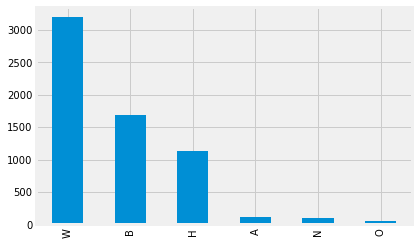

In [420]:
df['race'].value_counts().plot.bar()

<AxesSubplot:>

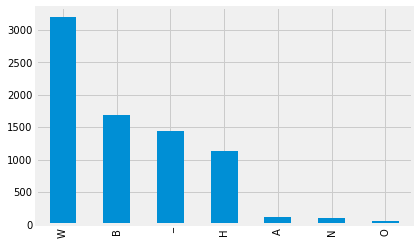

In [421]:
df['race'][df['race'].isnull()] = '_'
df['race'].value_counts().plot.bar()

In [422]:
pd.crosstab(df['year'],df['race']).style.background_gradient(cmap='summer_r')

race,A,B,H,N,O,W,_
year,,,,,,,
2015,15,258,173,9,14,502,23
2016,15,236,161,17,11,465,53
2017,16,222,180,22,6,457,77
2018,21,228,169,16,4,461,94
2019,20,251,168,13,9,424,114
2020,15,243,171,9,3,459,120
2021,4,177,78,6,0,302,484
2022,7,70,28,5,0,127,477


Как понимаю в США, в документах заполнение графы race не обязательная и если она не заполнена то ее не пишут и видно что с каждым годом людей не знающих или не желающих заполнять эту графу становится больше.

# Точные геокодирование

In [424]:
df['is_geocoding_exact'].value_counts()

True     7691
False      18
Name: is_geocoding_exact, dtype: int64

In [425]:
print(len(df))
df.isnull().sum()

7709


armed                        0
age                          0
race                         0
city                         0
state                        0
signs_of_mental_illness      0
threat_level                 0
flee                         0
body_camera                  0
longitude                  833
latitude                   833
is_geocoding_exact           0
week                         0
year                         0
month                        0
dtype: int64

Исходя из того что longitude и latitude в 833 случаях являются пустыми, но при это is_geocoding_exact говорится что их показания в 7691 из 7709 являются истинными. Исходя из этого, как минимум 10% утверждений являются ложными. И верить им нельзя.

In [455]:
df = df.drop(columns=['longitude','latitude','is_geocoding_exact'])

KeyError: "['longitude', 'latitude', 'is_geocoding_exact'] not found in axis"

# Признаки психологического забеливания

<AxesSubplot:>

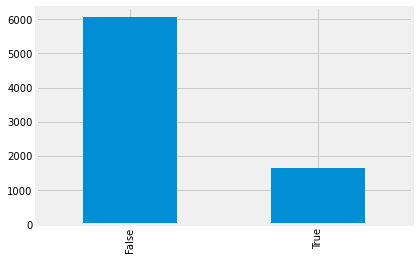

In [448]:
df['signs_of_mental_illness'].value_counts().plot.bar()

In [454]:
pd.crosstab(df['year'],df['signs_of_mental_illness']).\
    style.background_gradient(cmap='summer_r')

signs_of_mental_illness,False,True
year,,
2015,734,260
2016,710,248
2017,743,237
2018,772,221
2019,783,216
2020,801,219
2021,904,147
2022,623,91


In [459]:
pd.crosstab(df['race'],df['signs_of_mental_illness']).\
    style.background_gradient(cmap='summer_r')

signs_of_mental_illness,False,True
race,,
A,84,29
B,1429,256
H,936,192
N,81,16
O,37,10
W,2293,904
_,1210,232


In [458]:
pd.crosstab(df['threat_level'],df['signs_of_mental_illness']).\
    style.background_gradient(cmap='summer_r')

signs_of_mental_illness,False,True
threat_level,,
attack,3857,1007
other,1955,593
undetermined,258,39


У людей с признаки психологического заболивания


<AxesSubplot:>

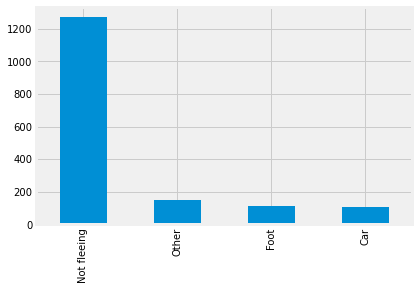

In [449]:
print('У людей с признаки психологического забеливания')
df['flee'][df['signs_of_mental_illness'] == True].value_counts().plot.bar()

У всех


<AxesSubplot:>

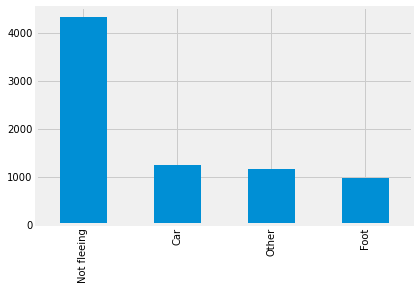

In [450]:
print('У всех')
df['flee'].value_counts().plot.bar()

У людей с признаки психологического забеливания они не скрываются, преступления с их участием с каждым годом уменьшается, и чаще всего в атаке(attack в таблицу threat_level). Чаще всего преступления совершаютcя людьми расы 'W' с признаки психологического забеливаниями.

# Город

<AxesSubplot:>

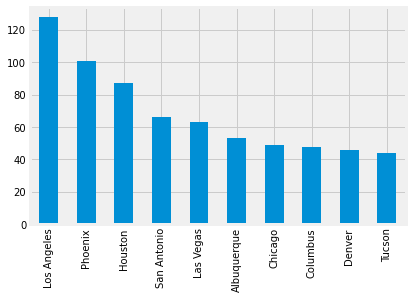

In [467]:
df['city'].value_counts().head(10).plot.bar()

# Штат

<AxesSubplot:>

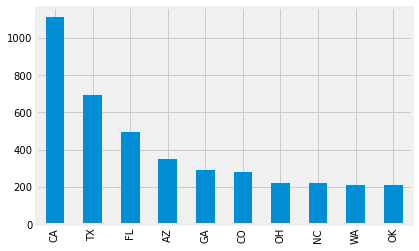

In [465]:
df['state'].value_counts().head(10).plot.bar()

In [462]:
print('Получаем таблицу')
df.head(10)

Получаем таблицу


,armed,age,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,week,year,month
0,gun,53.0,A,Shelton,WA,True,attack,Not fleeing,False,4,2015,1
1,gun,47.0,W,Aloha,OR,False,attack,Not fleeing,False,4,2015,1
2,unarmed,23.0,H,Wichita,KS,False,other,Not fleeing,False,5,2015,1
3,toy weapon,32.0,W,San Francisco,CA,True,attack,Not fleeing,False,6,2015,1
4,nail gun,39.0,H,Evans,CO,False,attack,Not fleeing,False,6,2015,1
5,gun,18.0,W,Guthrie,OK,False,attack,Not fleeing,False,6,2015,1
6,gun,22.0,H,Chandler,AZ,False,attack,Car,False,0,2015,1
7,gun,35.0,W,Assaria,KS,False,attack,Not fleeing,False,1,2015,1
8,unarmed,34.0,W,Burlington,IA,False,other,Not fleeing,True,1,2015,1
9,toy weapon,47.0,B,Knoxville,PA,False,attack,Not fleeing,False,1,2015,1


Вывод психологические заболевания не влияют на количество преступлений, однако количество преступлений с психологическим заболеванием у расы 'W' заметно выше чем у других рас. По времени года самым опасным временем считается Март в будни, а выходные самыми безопасными. Преступления чаще всего совершаются в возрасте от 20 до 50 лет. Самым опасным штатом является 'CA', а самыми опасными городами являются  Los Angeles и Phoenix. Количество преступлений зафиксированное камерой растет и это помогает разобраться в причинах преступления. Почти всегда в преступлениях участвуют мужчины. Самое частое оружие это пистолет и нож.